In [1]:
import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-colorblind')

import pylab

import os
from os import listdir
from os.path import isfile, join
import glob

C:\Users\190243539\AppData\Local\Temp\ipykernel_250804\2709949493.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


### Оконный метод

#### первая попытка, глядим разные интеграторы

In [21]:
integrator_names = {45: 'BO',  46: 'AL', 47: 'BOmod', 48: 'ALmod', 49: 'RK4', 50: 'RK4mod',
                        51: 'CN', 52:'CNmod', 53:'CT4', 54:'ESS2A', 55:'ESS2B', 56:'ES4', 57:'QES4', 58: 'TES4',
                        59: 'TES4SA', 60: 'TES4SB', 61: 'CF42',
                       100: 'FNFT_BO1A', 101: 'FNFT_BO1B', 102: 'FNFT_BO2A', 103: 'FNFT_BO2B', 
                       104: 'FNFT_BO2S', 105: 'FNFT_BO3A', 106: 'FNFT_BO3B', 107: 'FNFT_BO3S', 
                       108: 'FNFT_BO4A', 109: 'FNFT_BO4B', 110: 'FNFT_BO5A', 111: 'FNFT_BO5B', 
                       112: 'FNFT_BO6A', 113: 'FNFT_BO6B', 114: 'FNFT_BO7A', 115: 'FNFT_BO7B', 
                       116: 'FNFT_BO8A', 117: 'FNFT_BO8B', 118: 'FNFT_AL2',
                       119: 'FNFT_QES4_4A', 120: 'FNFT_QES4_4B', 121: 'FNFT_QES4_5A', 122: 'FNFT_QES4_5B',
                       123: 'FNFT_QES4_6A', 124: 'FNFT_QES4_6B', 125: 'FNFT_QES4_7A', 126: 'FNFT_QES4_7B',
                       127: 'FNFT_QES4_8A', 128: 'FNFT_QES4_8B',
                       129: 'FNFT_TES4_4A', 130: 'FNFT_TES4_4B', 131: 'FNFT_TES4_5A', 132: 'FNFT_TES4_5B',
                       133: 'FNFT_TES4_6A', 134: 'FNFT_TES4_6B', 135: 'FNFT_TES4_7A', 136: 'FNFT_TES4_7B',
                       137: 'FNFT_TES4_8A', 138: 'FNFT_TES4_8B',
                       139: 'FTES4SA', 140: 'FTES4SB',
                       141: 'FNFT_CF42_A', 142: 'FNFT_CF42_B'}
inverse_method_names = {
    430: 'IFNFT_AL', 438: 'TIB'
}

area = (20 * np.random.rand(13))**2  # 0 to 10 point radii
colors = np.sqrt(area)

markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

field_name = {'symbolCountSlice': ''
    
}

In [6]:
df = df_temp_mean[['symbolCountCut', 'BER_NFT', 'RMSE_NFT', 'BER_DBP', 'RMSE_DBP', 'inverseMethod', 'P0', 'integrator', 'CDC', 'processedSymbolsCount',
       'dispersionWidth', 'zeroPaddingWidth', 'zeroPadding', 'dispersionSymbolsCount']]

df_min = []
df_min_ifnft = []
df_min_tib = []

for ind0,p0 in enumerate(df["P0"].unique()):
    df0 = df[df["P0"] == p0]
    df_min.append(df0[df0.BER_NFT == df0.BER_NFT.min()])
    
    df1 = df0[df0['inverseMethod'] == 430]
    df_min_ifnft.append(df1[df1.BER_NFT == df1.BER_NFT.min()])
    
    df1 = df0[df0['inverseMethod'] == 438]
    df_min_tib.append(df1[df1.BER_NFT == df1.BER_NFT.min()])
            
df_min = pd.concat(df_min, axis=0, ignore_index=True)
df_min_ifnft = pd.concat(df_min_ifnft, axis=0, ignore_index=True)
df_min_tib = pd.concat(df_min_tib, axis=0, ignore_index=True)

df_min.to_excel("BER_NFT_min.xlsx", sheet_name='all_inverse_methods')
df_min_ifnft.to_excel("BER_NFT_min.xlsx", sheet_name='ifnft')
df_min_tib.to_excel("BER_NFT_min.xlsx", sheet_name='tib')

NameError: name 'df_temp_mean' is not defined

In [4]:
df_min = []

for ind0,p0 in enumerate(df["P0"].unique()):
    df0 = df[df["P0"] == p0]
    print(p0)
    print(df0[df0.RMSE_NFT == df0.RMSE_NFT.min()])
    df_min.append(df0[df0.RMSE_NFT == df0.RMSE_NFT.min()])
            
df_min = pd.concat(df_min, axis=0, ignore_index=True)
df_min.to_excel("RMSE_NFT_min.xlsx")

NameError: name 'df' is not defined

# ДОБАВЛЯЕМ ПОДКРУТКУ ФАЗЫ

In [2]:
# New version 2
def plotFigures(path, df_temp_mean, plotType, x="P0", xLabel="Average power, dBm",    
                zeroAxisName = "processedSymbolsCount", # разные группы картинок
                firstAxisName = "nonzeroSymbolCount", # первая ось внутри группы картинок
                secondAxisName = "SpS", # вторая ось внутри группы картинок
                logx=False,
                logy=False,
                specialTicks=False
               ):
        
    for ind0,zeroAxis in enumerate(df_temp_mean[zeroAxisName].unique()):
        print("Zero axis:", zeroAxisName + " = ", zeroAxis) 

        df1 = df_temp_mean[df_temp_mean[zeroAxisName] == zeroAxis]
        
        firstAxesLength = len(df_temp_mean[firstAxisName].unique())
        secondAxesLength = len(df_temp_mean[secondAxisName].unique())
        print(firstAxisName, firstAxesLength, secondAxisName, secondAxesLength)
        
        fig, axes = plt.subplots(len(df_temp_mean[firstAxisName].unique()),
                                 len(df_temp_mean[secondAxisName].unique()),
                                 figsize=(7 * secondAxesLength, 5 * firstAxesLength))
        print("axes:",axes)
        
        plt.subplots_adjust(left=None, bottom=0.25, right=None, top=None, wspace=0.2, hspace=0.6)
        
        plt.suptitle(plotType[0].split('_')[0] + ", " + zeroAxisName + "=" + str(zeroAxis))
        
        for ind1,firstAxis in enumerate(df_temp_mean[firstAxisName].unique()):
            print("First axis:", firstAxisName + " = ", firstAxis) 
            
            df2 = df1[df1[firstAxisName] == firstAxis]

            for ind2, secondAxis in enumerate(df2[secondAxisName].unique()):
                print("Second axis:", secondAxisName + " = ", secondAxis) 
                
                df3 = df2[df2[secondAxisName] == secondAxis]
                
                axesInd = ind1 * secondAxesLength + ind2

                if firstAxesLength > 1 or secondAxesLength > 1:
                    axes.flatten()[axesInd].set_title(firstAxisName + "=" + str(firstAxis) + ", " + secondAxisName + "=" + str(secondAxis))
                else:
                    axes.set_title(secondAxisName + "=" + str(int(secondAxis)))

                #axes.set_ylim(1e-5,1)
                #axes[ind1,ind2].set_xlim(df2["P0"].min(), df2["P0"].max())

                legend = []
                
                for plottype in plotType:
                    if firstAxesLength > 1 or secondAxesLength > 1:
                        df3.plot(ax=axes.flatten()[axesInd], kind="line",
                                 x=x, logx=logx, y=[plottype], logy=logy, xlabel=xLabel)
                    else:
                        df3.plot(ax=axes, kind="line",
                                 x=x, logx=logx, y=[plottype], logy=logy, xlabel=xLabel)
                    
                    name = plottype.split("_")
                    if len(name) > 1:
                        legend.append(name[1])
                    else:
                        legend.append(name[0])
                
                if firstAxesLength > 1 or secondAxesLength > 1:
                    axes.flatten()[axesInd].legend(legend)
                else:
                    axes.legend(legend)
                
                if specialTicks:
                    ticks = df_temp_mean[x].unique()
                    axes.set_xticks(ticks)
                    axes.set_xticklabels(matplotlib.ticker.FormatStrFormatter('%d').format_ticks(ticks))

        print(path + "/" + plotType[0].split('_')[0] + "_" + zeroAxisName + "=" + str(zeroAxis) + ".png")
        pylab.savefig(path + "/" + plotType[0].split('_')[0] + "_" + zeroAxisName + "=" + str(zeroAxis) + ".png", format='png', dpi=300, bbox_inches='tight')

In [57]:
df.columns

Index(['integrator', 'inverseMethod', 'CDC', 'seed', 'nonzeroSymbolCount',
       'P0', 'PNoise', 'OSNR', 'SpS', 'processedSymbolsCount',
       'dispersionWidth', 'zeroPaddingWidth', 'processingSteps',
       'symbolCountSlice', 'zeroPadding', 'dispersionSymbolsCount', 'BER_NFT',
       'BER_NFTWindow', 'BER_DBP2', 'BER_CDC', 'BER_DBP10', 'BER_DBP1',
       'BER_DBP3', 'RNMSE_NFT', 'RNMSE_NFTWindow', 'RNMSE_DBP', 'RNMSE_CDC',
       'RNMSE_DBP10', 'RNMSE_DBP1', 'RNMSE_DBP3', 'EVM_NFT', 'EVM_NFTWindow',
       'EVM_DBP2', 'EVM_CDC', 'EVM_DBP10', 'EVM_DBP1', 'EVM_DBP3',
       'failedSlices', 'DSSize', 'DirectEnT', 'DirectEnC', 'DirectEnD',
       'DirectEnRelError', 'DirectHamT', 'DirectHamC', 'DirectHamD',
       'DirectHamRelError', 'InvEnT', 'InvEnC', 'InvEnD', 'InvEnRelError',
       'InvHamT', 'InvHamC', 'InvHamD', 'InvHamRelError', 'CallsBoundaries',
       'CallsTracking', 'CallsOptimizer', 'timeBoundaries', 'timeTracking',
       'timeOptimizer', 'timeDirect', 'timePropagation'

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


Total: 920 0.9304347826086956
SpS=2: 920 0.9304347826086956
Zero axis: processedSymbolsCount =  256
symbolCountSlice 1 SpS 1
First axis: symbolCountSlice =  2048.0
Second axis: SpS =  2
Zero axis: processedSymbolsCount =  512
symbolCountSlice 1 SpS 1
First axis: symbolCountSlice =  2048.0
Second axis: SpS =  2
Zero axis: processedSymbolsCount =  256
symbolCountSlice 1 SpS 1
First axis: symbolCountSlice =  2048.0
Second axis: SpS =  2
Zero axis: processedSymbolsCount =  512
symbolCountSlice 1 SpS 1
First axis: symbolCountSlice =  2048.0
Second axis: SpS =  2
Zero axis: processedSymbolsCount =  256
symbolCountSlice 1 SpS 1
First axis: symbolCountSlice =  2048.0
Second axis: SpS =  2
Zero axis: processedSymbolsCount =  512
symbolCountSlice 1 SpS 1
First axis: symbolCountSlice =  2048.0
Second axis: SpS =  2
Zero axis: processedSymbolsCount =  256
symbolCountSlice 1 SpS 1
First axis: symbolCountSlice =  2048.0
Second axis: SpS =  2
Zero axis: processedSymbolsCount =  512
symbolCountSlice 1

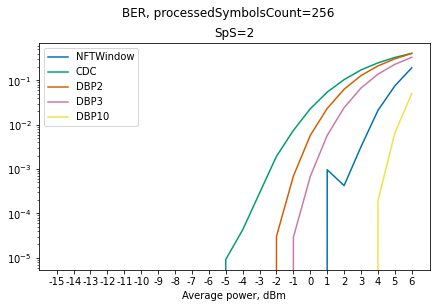

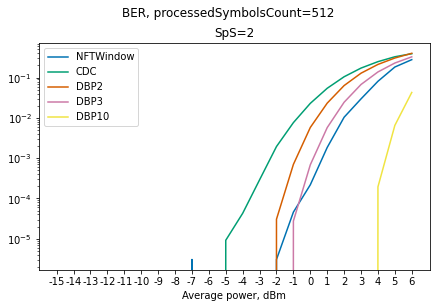

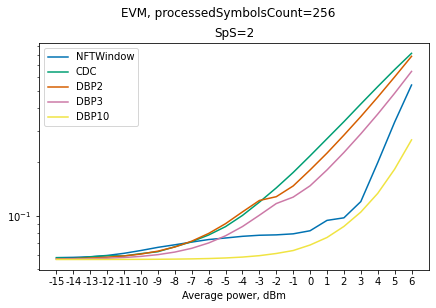

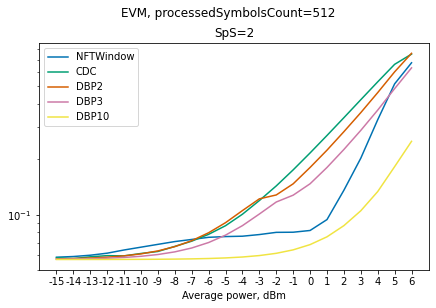

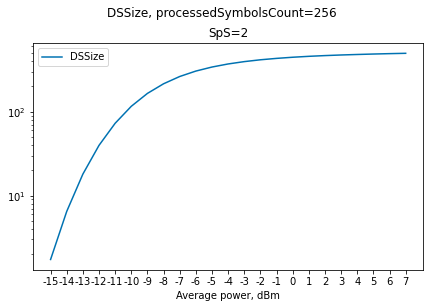

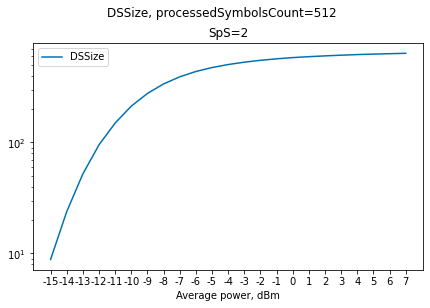

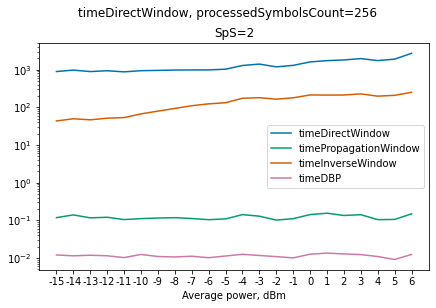

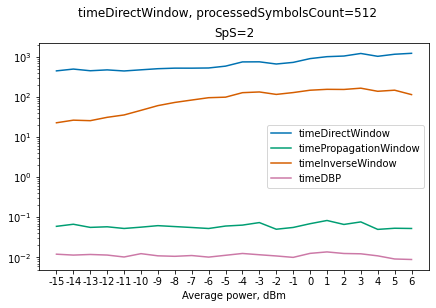

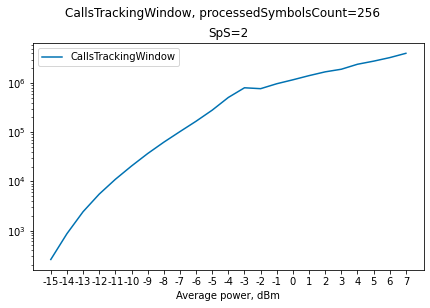

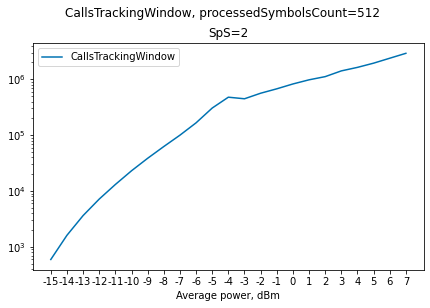

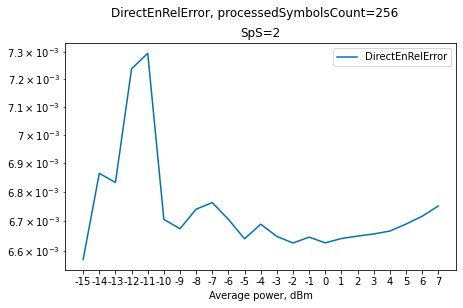

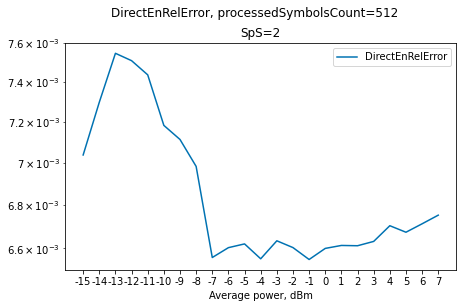

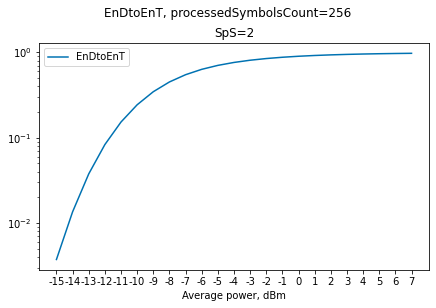

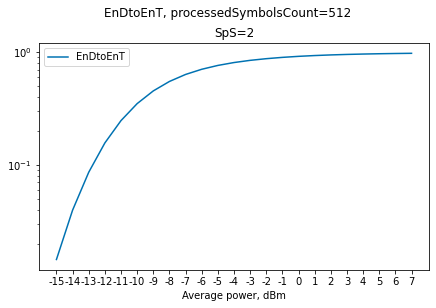

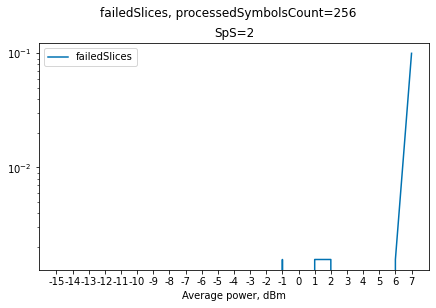

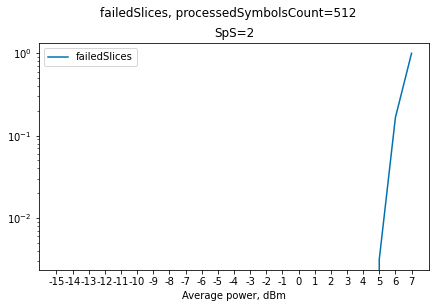

In [68]:
directory="data"
for folder in glob.glob(directory + "/*/", recursive = True):
    if "tw=256 shift=0 upsampling=32" in folder:
        all_files = glob.glob(folder + "TelecomTest*")
        li = []

        for filename in all_files:
            if os.path.getsize(filename) != 0:
                df = pd.read_csv(filename, "\t")
                li.append(df)

        if len(li) > 0:
            df = pd.concat(li, axis=0, ignore_index=True)

            df_clean = df[df.failedSlices == 0]

            print("Total:", len(df), len(df_clean)/len(df))
            
            df2 = df[df.SpS == 2]
            df4 = df[df.SpS == 4]
            dfc2 = df_clean[df_clean.SpS == 2]
            dfc4 = df_clean[df_clean.SpS == 4]
            
            print("SpS=2:", len(df2), len(dfc2)/len(df2))
            #print("SpS=4:", len(df4), len(dfc4)/len(df4))
            #continue
            
            df_mean = df.groupby(['inverseMethod', 'P0', 'SpS', 'integrator', 'CDC', 'processedSymbolsCount',
                   'dispersionWidth', 'zeroPaddingWidth', 'zeroPadding', 'dispersionSymbolsCount']).mean().reset_index()

            df_clean_mean = df_clean.groupby(['inverseMethod', 'P0', 'SpS', 'integrator', 'CDC', 'processedSymbolsCount',
                   'dispersionWidth', 'zeroPaddingWidth', 'zeroPadding', 'dispersionSymbolsCount']).mean().reset_index()
            
            #zeroAxisName = "P0" # разные группы картинок
            firstAxisName = "symbolCountSlice" # первая ось внутри группы картинок
            secondAxisName = "SpS"
            #x='processedSymbolsCount'
            #xLabel='processedSymbolsCount'
            logy=True

            plotFigures(folder, df_clean_mean, ["BER_NFTWindow", "BER_CDC", "BER_DBP2", "BER_DBP3", "BER_DBP10"], firstAxisName = firstAxisName, logy=logy)
            plotFigures(folder, df_clean_mean, ["EVM_NFTWindow", "EVM_CDC", "EVM_DBP2", "EVM_DBP3", "EVM_DBP10"], firstAxisName = firstAxisName, logy=logy)
            #plotFigures(folder, df_clean_mean, ["BER_NFTWindow", "BER_CDC", "BER_DBP2",  "BER_DBP10"], firstAxisName = firstAxisName, logy=logy)
            #plotFigures(folder, df_clean_mean, ["EVM_NFTWindow", "EVM_CDC", "EVM_DBP2", "EVM_DBP10"], firstAxisName = firstAxisName, logy=logy)
            plotFigures(folder, df_mean, ["DSSize"], firstAxisName = firstAxisName, logy=logy)

            plotFigures(folder, df_clean_mean, ['timeDirectWindow', "timePropagationWindow", "timeInverseWindow", "timeDBP"], firstAxisName = firstAxisName, logy=logy)
            plotFigures(folder, df_mean, ["CallsTrackingWindow"], firstAxisName = firstAxisName, logy=logy)
            plotFigures(folder, df_mean, ["DirectEnRelError"], firstAxisName = firstAxisName, logy=logy)
            
            df_mean['EnDtoEnT'] = df_mean['DirectEnD'] / df_mean['DirectEnT']
            plotFigures(folder, df_mean, ["EnDtoEnT"], firstAxisName = firstAxisName, logy=logy)

            plotFigures(folder, df_mean, ["failedSlices"], firstAxisName = firstAxisName, logy=logy)

# Влияние размера окна на устойчивость


 data\upsampling=16\
data\upsampling=16\TelecomTest.csv
Total: 1776 0.9290540540540541
SpS=2: 1071 0.8832866479925303
	P0=-5: 702 0.9715099715099715
	P0=5: 369 0.7154471544715447
SpS=4: 705 0.9985815602836879
	P0=-5: 610 1.0
	P0=5: 95 0.9894736842105263
Zero axis: P0 =  -5
First axis: symbolCountSlice =  2048.0
Second axis: SpS =  2
Second axis: SpS =  4


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


Zero axis: P0 =  5
First axis: symbolCountSlice =  2048.0
Second axis: SpS =  2
Second axis: SpS =  4
Zero axis: P0 =  -5
First axis: symbolCountSlice =  2048.0
Second axis: SpS =  2
Second axis: SpS =  4
Zero axis: P0 =  5
First axis: symbolCountSlice =  2048.0
Second axis: SpS =  2
Second axis: SpS =  4
Zero axis: P0 =  -5
First axis: symbolCountSlice =  2048.0
Second axis: SpS =  2
Second axis: SpS =  4
Zero axis: P0 =  5
First axis: symbolCountSlice =  2048.0
Second axis: SpS =  2
Second axis: SpS =  4
Zero axis: P0 =  -5
First axis: symbolCountSlice =  2048.0
Second axis: SpS =  2
Second axis: SpS =  4


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:561: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  labels = axis.get_majorticklabels() + axis.get_minorticklabels()


Zero axis: P0 =  5
First axis: symbolCountSlice =  2048.0
Second axis: SpS =  2
Second axis: SpS =  4
Zero axis: P0 =  -5
First axis: symbolCountSlice =  2048.0
Second axis: SpS =  2
Second axis: SpS =  4
Zero axis: P0 =  5
First axis: symbolCountSlice =  2048.0
Second axis: SpS =  2
Second axis: SpS =  4


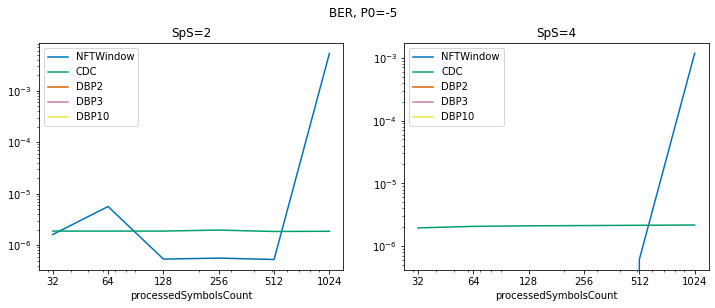

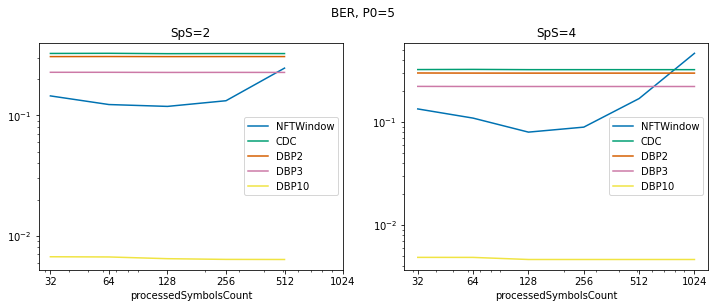

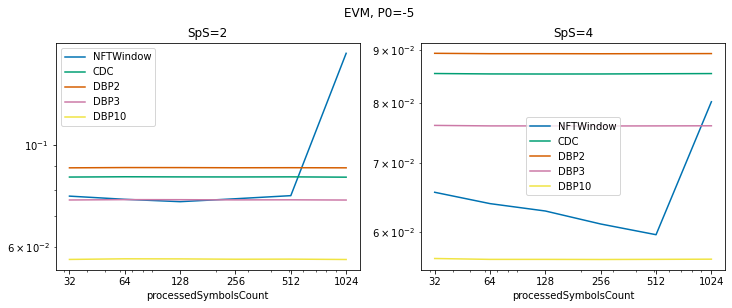

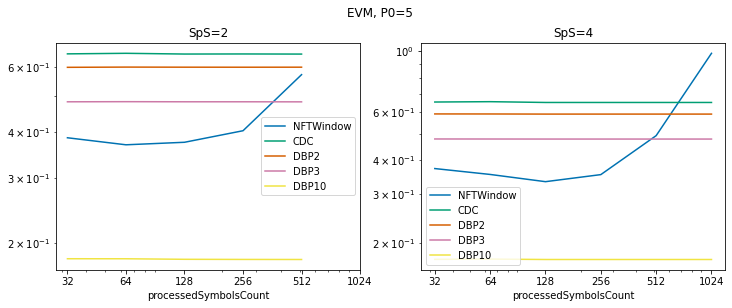

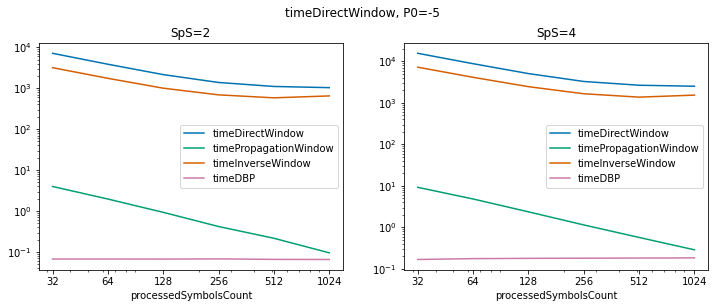

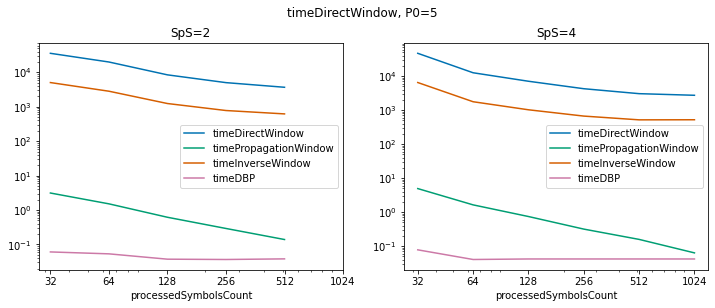

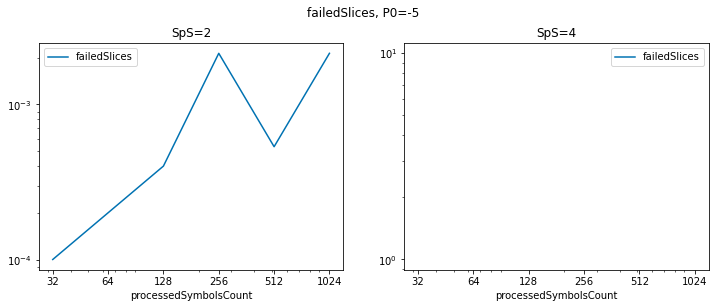

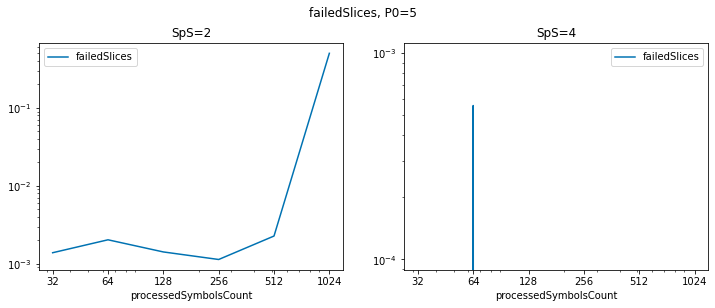

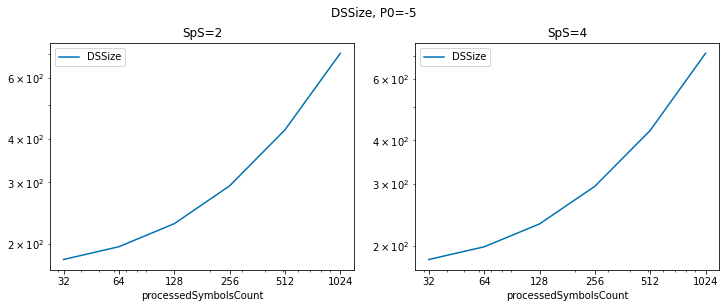

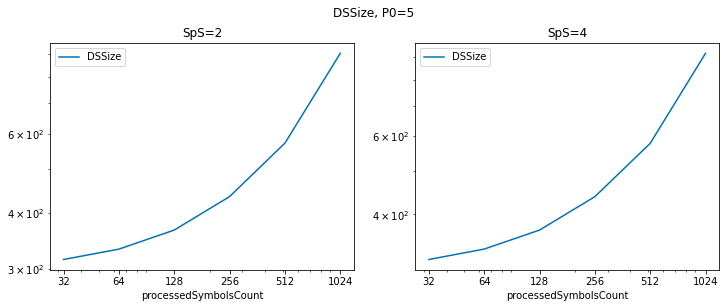

In [23]:
directory="data"
for folder in glob.glob(directory + "/*/", recursive = True):
    if "upsampling=16" in folder:
        print("\n",folder)
        all_files = glob.glob(folder + "TelecomTest*")
        li = []

        for filename in all_files:
            if os.path.getsize(filename) != 0:
                print(filename)
                df = pd.read_csv(filename, "\t")
                li.append(df)
        
        if len(li) > 0:
            df = pd.concat(li, axis=0, ignore_index=True)

            df_clean = df[df.failedSlices == 0]

            print("Total:", len(df), len(df_clean)/len(df))
            
            df2 = df[df.SpS == 2]
            df4 = df[df.SpS == 4]
            dfc2 = df_clean[df_clean.SpS == 2]
            dfc4 = df_clean[df_clean.SpS == 4]
            
            print("SpS=2:", len(df2), len(dfc2)/len(df2))
            print("\tP0=-5:", len(df2[df2.P0 == -5]), len(dfc2[dfc2.P0 == -5])/len(df2[df2.P0 == -5]))
            print("\tP0=5:",  len(df2[df2.P0 == 5]),  len(dfc2[dfc2.P0 == 5]) /len(df2[df2.P0 == 5]))
            print("SpS=4:", len(df4), len(dfc4)/len(df4))
            print("\tP0=-5:", len(df4[df4.P0 == -5]), len(dfc4[dfc4.P0 == -5])/len(df4[df4.P0 == -5]))
            print("\tP0=5:",  len(df4[df4.P0 == 5]),  len(dfc4[dfc4.P0 == 5]) /len(df4[df4.P0 == 5]))
            #continue
            
            df_mean = df.groupby(['inverseMethod', 'P0', 'SpS', 'integrator', 'CDC', 'processedSymbolsCount',
                   'dispersionWidth', 'zeroPaddingWidth', 'zeroPadding', 'dispersionSymbolsCount']).mean().reset_index()

            df_clean_mean = df_clean.groupby(['inverseMethod', 'P0', 'SpS', 'integrator', 'CDC', 'processedSymbolsCount',
                   'dispersionWidth', 'zeroPaddingWidth', 'zeroPadding', 'dispersionSymbolsCount']).mean().reset_index()
            
            zeroAxisName = "P0" # разные группы картинок
            firstAxisName = "symbolCountSlice" # первая ось внутри группы картинок
            secondAxisName = "SpS"
            x='processedSymbolsCount'
            xLabel='processedSymbolsCount'
            logx=True
            logy=True

            plotFigures(folder, df_clean_mean, ["BER_NFTWindow", "BER_CDC", "BER_DBP2", "BER_DBP3", "BER_DBP10"],
                        zeroAxisName = zeroAxisName, firstAxisName = firstAxisName, secondAxisName = secondAxisName,
                        x=x, xLabel=xLabel, logx=logx, logy=logy)

            plotFigures(folder, df_clean_mean, ["EVM_NFTWindow", "EVM_CDC", "EVM_DBP2", "EVM_DBP3", "EVM_DBP10"],
                        zeroAxisName = zeroAxisName, firstAxisName = firstAxisName, secondAxisName = secondAxisName,
                        x=x, xLabel=xLabel, logx=logx, logy=logy)

            plotFigures(folder, df_clean_mean, ['timeDirectWindow', "timePropagationWindow", "timeInverseWindow", "timeDBP"],
                        zeroAxisName = zeroAxisName, firstAxisName = firstAxisName, secondAxisName = secondAxisName,
                        x=x, xLabel=xLabel, logx=logx, logy=logy)

            plotFigures(folder, df_mean, ["failedSlices"],
                        zeroAxisName = zeroAxisName, firstAxisName = firstAxisName, secondAxisName = secondAxisName,
                        x=x, xLabel=xLabel, logx=logx, logy=logy)

            plotFigures(folder, df_mean, ["DSSize"],
                        zeroAxisName = zeroAxisName, firstAxisName = firstAxisName, secondAxisName = secondAxisName,
                        x=x, xLabel=xLabel, logx=logx, logy=logy)


In [ ]:
df2 = df[df.SpS == 2]

In [9]:


all_files = glob.glob("data/TelecomTest*")
#all_files = glob.glob("data/32 symbols with phase rotation - bad pjt/TelecomTest*")
print(all_files)
li = []

for filename in all_files:
    if os.path.getsize(filename) != 0:
        df = pd.read_csv(filename, "\t")
        li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

print(df.columns)

#df_temp_mean = df.groupby(['inverseMethod', 'P0', 'SpS', 'integrator', 'CDC', 'processedSymbolsCount',
#       'dispersionWidth', 'zeroPaddingWidth', 'zeroPadding', 'dispersionSymbolsCount']).mean().reset_index()

#df_temp_mean['FailedCalcutionsRatio'] = df_temp_mean[df_temp_mean.BER_NFTWindow < 1] / 

###############################

df33 = df[df.BER_NFTWindow < 1]

print(len(df), len(df33)/len(df))

df_temp_mean = df33.groupby(['inverseMethod', 'P0', 'SpS', 'integrator', 'CDC', 'processedSymbolsCount',
       'dispersionWidth', 'zeroPaddingWidth', 'zeroPadding', 'dispersionSymbolsCount']).mean().reset_index()

plotFigures(df_temp_mean, ["BER_NFTWindow", "BER_CDC", "BER_DBP2", "BER_DBP3", "BER_DBP10"])
plotFigures(df_temp_mean, ["EVM_NFTWindow", "EVM_CDC", "EVM_DBP2", "EVM_DBP3", "EVM_DBP10"])
#plotFigures(df_temp_mean, ["BER_NFTWindow", "BER_CDC", "BER_DBP2",  "BER_DBP10"])
#plotFigures(df_temp_mean, ["EVM_NFTWindow", "EVM_CDC", "EVM_DBP2", "EVM_DBP10"])
plotFigures(df_temp_mean, ["DSSize"])

[]


ValueError: No objects to concatenate

256
nonzeroSymbolCount =  8192.0
256
nonzeroSymbolCount =  8192.0
256
nonzeroSymbolCount =  8192.0
256
nonzeroSymbolCount =  8192.0


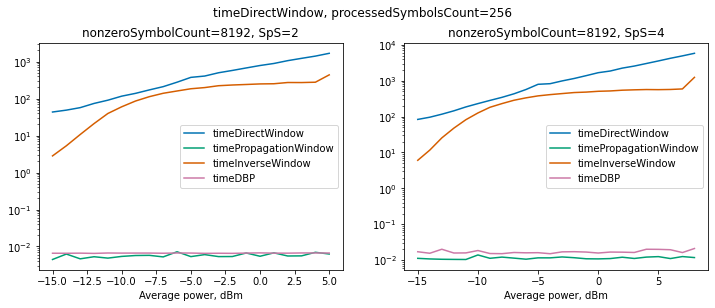

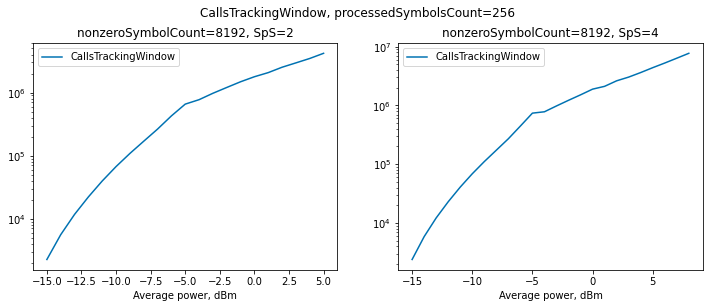

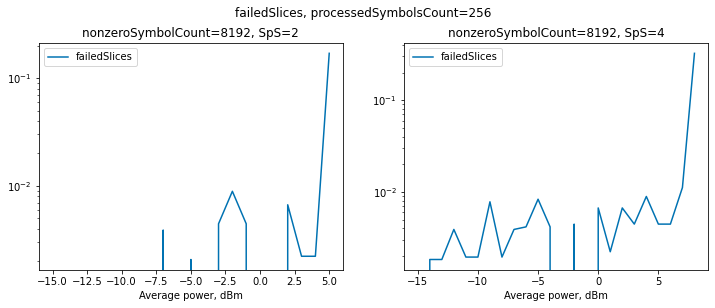

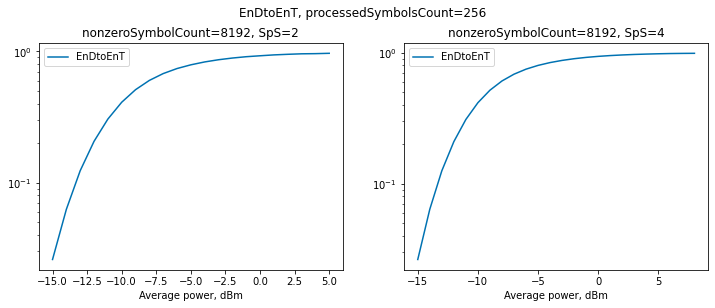

In [137]:

plotFigures(df_temp_mean, ['timeDirectWindow', "timePropagationWindow", "timeInverseWindow", "timeDBP"])
plotFigures(df_temp_mean, ["CallsTrackingWindow"])
plotFigures(df_temp_mean, ["failedSlices"])

df_temp_mean['EnDtoEnT'] = df_temp_mean['DirectEnD'] / df_temp_mean['DirectEnT']
plotFigures(df_temp_mean, ["EnDtoEnT"])

# Влияние дисперсионных хвостов


На окне 2048 исследовал зависимость BER и EVM от размера дисперсионных хвостов. Тут использовался оверсэмплинг по непр. спектру 32. Даже с ним есть случаи, когда обратная задача не срабатывала


 data/dispersion wings analysis\2048_512_-15\
data/dispersion wings analysis\2048_512_-15\TelecomTest3_0_100.dat
Total: 468 0.9166666666666666
SpS=2: 468 0.9166666666666666
Zero axis: P0 =  -5
symbolCountSlice 1 processedSymbolsCount 6
axes: [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:>]
First axis: symbolCountSlice =  1024.0
Second axis: processedSymbolsCount =  8
Second axis: processedSymbolsCount =  16
Second axis: processedSymbolsCount =  32


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


Second axis: processedSymbolsCount =  64
Second axis: processedSymbolsCount =  128
Second axis: processedSymbolsCount =  256
data/dispersion wings analysis\2048_512_-15\/EnDtoEnT_P0=-5.png

 data/dispersion wings analysis\2048_512_-5\
data/dispersion wings analysis\2048_512_-5\TelecomTest3_0_20.dat
Total: 861 0.9988385598141696
SpS=2: 861 0.9988385598141696
Zero axis: P0 =  -5
symbolCountSlice 1 processedSymbolsCount 1
axes: AxesSubplot(0.125,0.125;0.775x0.755)
First axis: symbolCountSlice =  2048.0
Second axis: processedSymbolsCount =  512
data/dispersion wings analysis\2048_512_-5\/EnDtoEnT_P0=-5.png


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)



 data/dispersion wings analysis\2048_512_5\
data/dispersion wings analysis\2048_512_5\TelecomTest3_0_20.dat
Total: 451 0.7006651884700665
SpS=2: 451 0.7006651884700665
Zero axis: P0 =  5
symbolCountSlice 1 processedSymbolsCount 1
axes: AxesSubplot(0.125,0.125;0.775x0.755)
First axis: symbolCountSlice =  2048.0
Second axis: processedSymbolsCount =  512
data/dispersion wings analysis\2048_512_5\/EnDtoEnT_P0=5.png


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


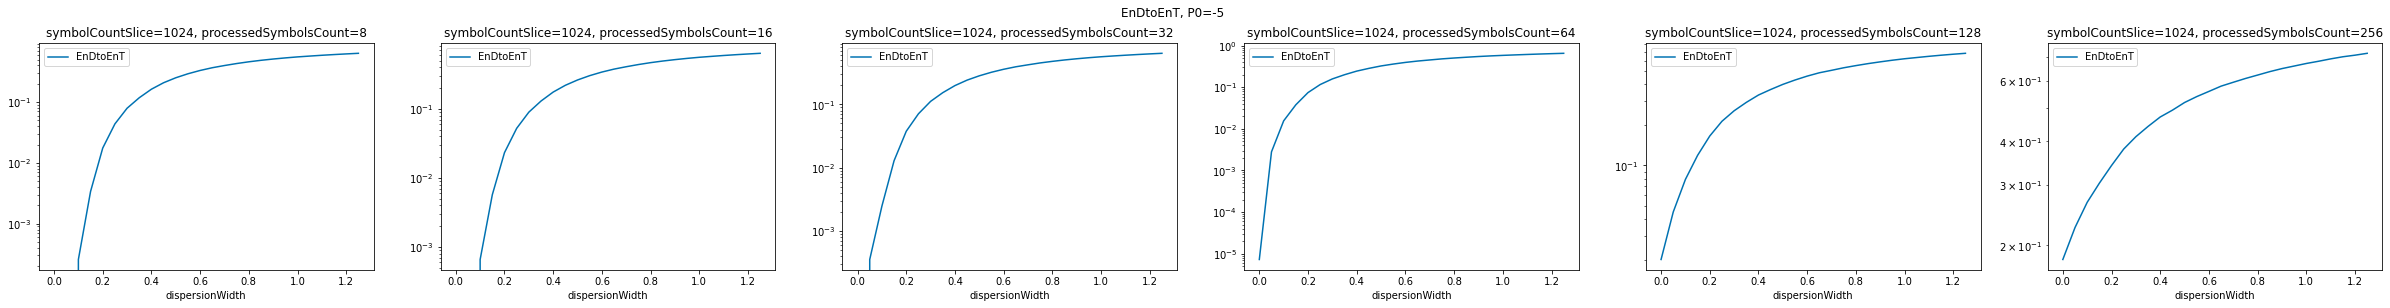

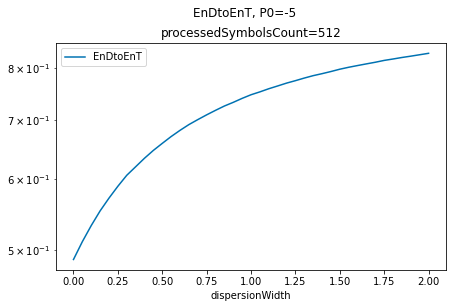

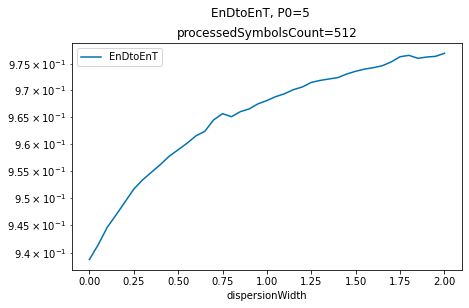

In [10]:
directory="data/dispersion wings analysis"
for folder in glob.glob(directory + "/*/", recursive = True):
    if "2048" in folder:
        print("\n",folder)
        all_files = glob.glob(folder + "TelecomTest*")
        li = []

        for filename in all_files:
            if os.path.getsize(filename) != 0:
                print(filename)
                df = pd.read_csv(filename, "\t")
                li.append(df)
        
        if len(li) > 0:
            df = pd.concat(li, axis=0, ignore_index=True)

            df_clean = df[df.failedSlices == 0]

            print("Total:", len(df), len(df_clean)/len(df))
            
            df2 = df[df.SpS == 2]
            df4 = df[df.SpS == 4]
            dfc2 = df_clean[df_clean.SpS == 2]
            dfc4 = df_clean[df_clean.SpS == 4]
            
            print("SpS=2:", len(df2), len(dfc2)/len(df2))
            #print("\tP0=-5:", len(df2[df2.P0 == -5]), len(dfc2[dfc2.P0 == -5])/len(df2[df2.P0 == -5]))
            #print("\tP0=5:",  len(df2[df2.P0 == 5]),  len(dfc2[dfc2.P0 == 5]) /len(df2[df2.P0 == 5]))
            #continue
            
            df_mean = df.groupby(['inverseMethod', 'P0', 'SpS', 'integrator', 'CDC', 'processedSymbolsCount',
                   'dispersionWidth', 'zeroPaddingWidth', 'zeroPadding', 'dispersionSymbolsCount']).mean().reset_index()

            df_clean_mean = df_clean.groupby(['inverseMethod', 'P0', 'SpS', 'integrator', 'CDC', 'processedSymbolsCount',
                   'dispersionWidth', 'zeroPaddingWidth', 'zeroPadding', 'dispersionSymbolsCount']).mean().reset_index()
            
            zeroAxisName = "P0" # разные группы картинок
            firstAxisName = "symbolCountSlice" # первая ось внутри группы картинок
            secondAxisName = "processedSymbolsCount"
            x='dispersionWidth'
            xLabel='dispersionWidth'
            logx=False
            logy=True

            plotFigures(folder, df_clean_mean, ["BER_NFTWindow", "BER_CDC", "BER_DBP2", "BER_DBP3", "BER_DBP10"],
                        zeroAxisName = zeroAxisName, firstAxisName = firstAxisName, secondAxisName = secondAxisName,
                        x=x, xLabel=xLabel, logx=logx, logy=logy)

            plotFigures(folder, df_clean_mean, ["EVM_NFTWindow", "EVM_CDC", "EVM_DBP2", "EVM_DBP3", "EVM_DBP10"],
                        zeroAxisName = zeroAxisName, firstAxisName = firstAxisName, secondAxisName = secondAxisName,
                        x=x, xLabel=xLabel, logx=logx, logy=logy)

            plotFigures(folder, df_clean_mean, ['timeDirectWindow', "timePropagationWindow", "timeInverseWindow", "timeDBP"],
                        zeroAxisName = zeroAxisName, firstAxisName = firstAxisName, secondAxisName = secondAxisName,
                        x=x, xLabel=xLabel, logx=logx, logy=logy)

            plotFigures(folder, df_mean, ["failedSlices"],
                        zeroAxisName = zeroAxisName, firstAxisName = firstAxisName, secondAxisName = secondAxisName,
                        x=x, xLabel=xLabel, logx=logx, logy=logy)

            plotFigures(folder, df_mean, ["DSSize"],
                        zeroAxisName = zeroAxisName, firstAxisName = firstAxisName, secondAxisName = secondAxisName,
                        x=x, xLabel=xLabel, logx=logx, logy=logy)
            
            df_mean['EnDtoEnT'] = df_mean['DirectEnD'] / df_mean['DirectEnT']
            plotFigures(folder, df_mean, ["EnDtoEnT"],
                        zeroAxisName = zeroAxisName, firstAxisName = firstAxisName, secondAxisName = secondAxisName,
                        x=x, xLabel=xLabel, logx=logx, logy=logy)

# ШУМ

C:\Users\190243539\AppData\Local\Temp\ipykernel_250804\1766125668.py:9: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv(filename, "\t")
C:\Users\190243539\AppData\Local\Temp\ipykernel_250804\1766125668.py:9: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv(filename, "\t")
C:\Users\190243539\AppData\Local\Temp\ipykernel_250804\1766125668.py:9: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv(filename, "\t")
C:\Users\190243539\AppData\Local\Temp\ipykernel_250804\1766125668.py:9: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv(filename, "\t")
C:\Users\190243539\A

Total: 26983 0.879627913871697
SpS=2: 26983 0.879627913871697
Zero axis: processedSymbolsCount =  512
symbolCountSlice 1 PNoise 2
axes: [<Axes: > <Axes: >]
First axis: symbolCountSlice =  2048.0
Second axis: PNoise =  -1000000.0
Second axis: PNoise =  4.5
data/Noise\4.5\/BER_processedSymbolsCount=512.png
Zero axis: processedSymbolsCount =  512
symbolCountSlice 1 PNoise 2
axes: [<Axes: > <Axes: >]
First axis: symbolCountSlice =  2048.0
Second axis: PNoise =  -1000000.0
Second axis: PNoise =  4.5
data/Noise\4.5\/EVM_processedSymbolsCount=512.png
Zero axis: processedSymbolsCount =  512
symbolCountSlice 1 PNoise 2
axes: [<Axes: > <Axes: >]
First axis: symbolCountSlice =  2048.0
Second axis: PNoise =  -1000000.0
Second axis: PNoise =  4.5
data/Noise\4.5\/DSSize_processedSymbolsCount=512.png
Zero axis: processedSymbolsCount =  512
symbolCountSlice 1 PNoise 2
axes: [<Axes: > <Axes: >]
First axis: symbolCountSlice =  2048.0
Second axis: PNoise =  -1000000.0
Second axis: PNoise =  4.5
data/Nois

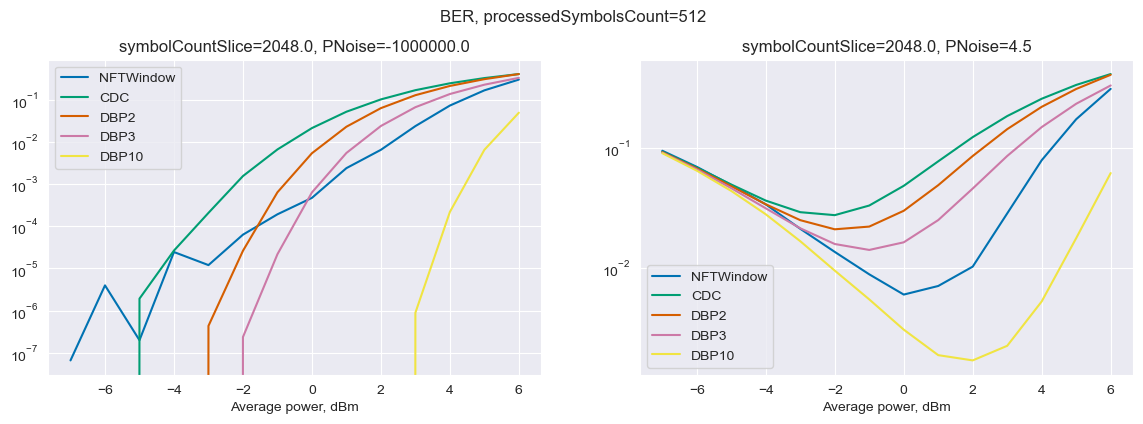

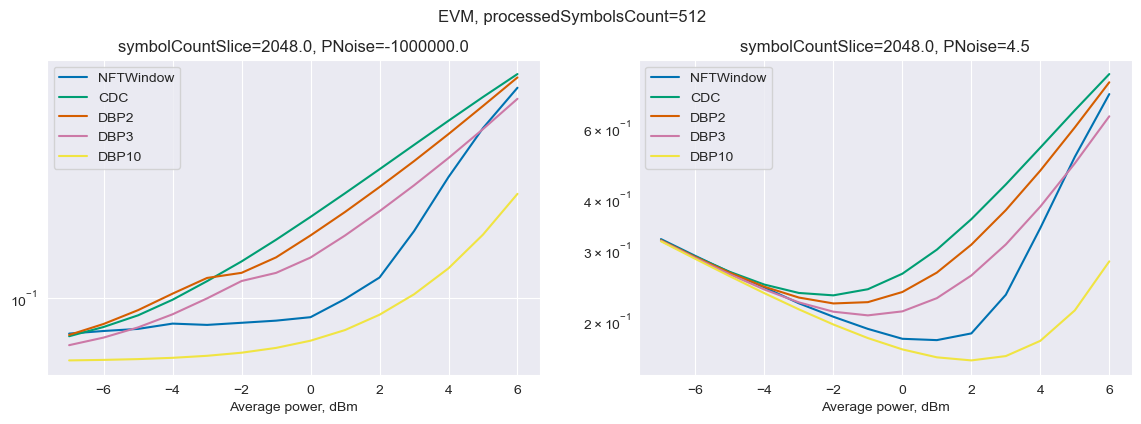

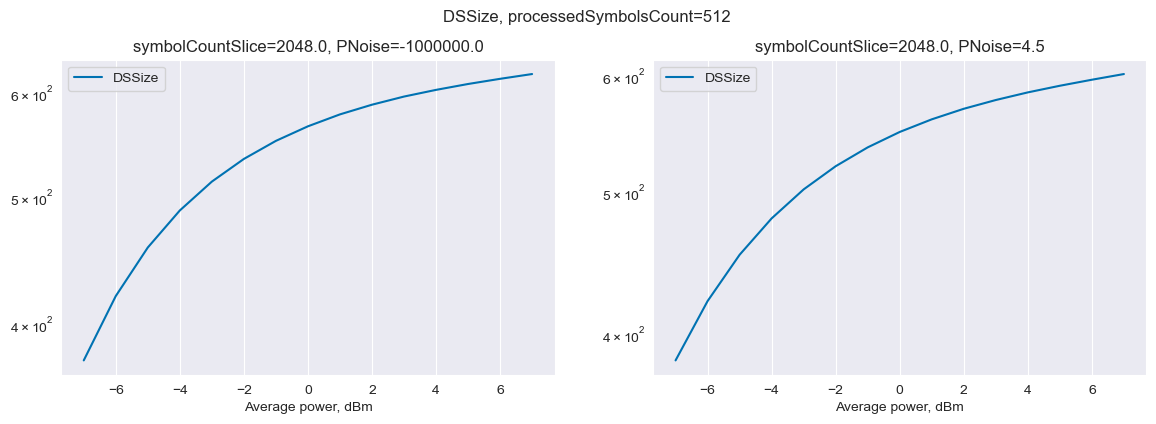

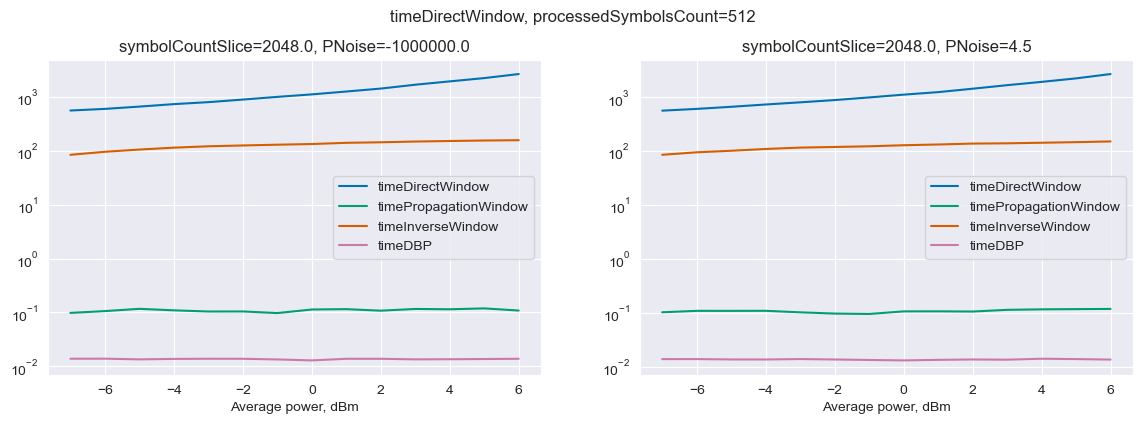

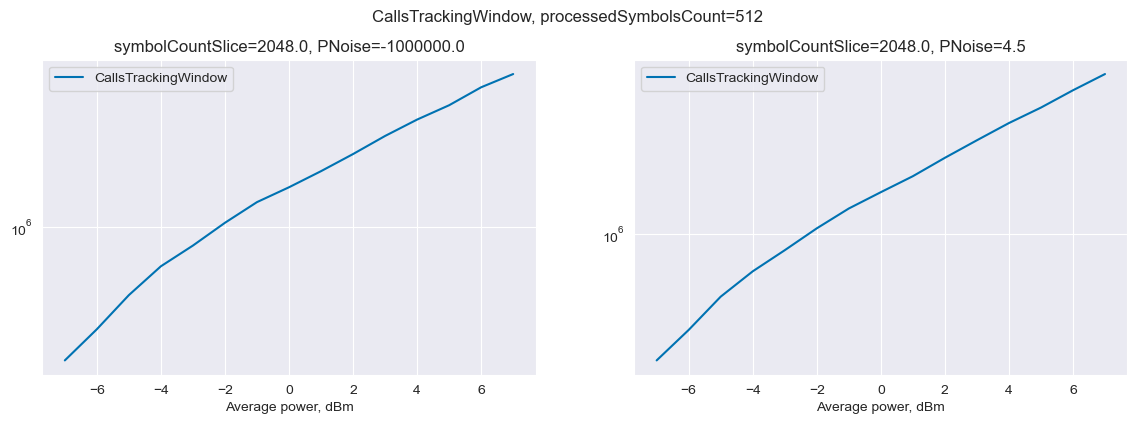

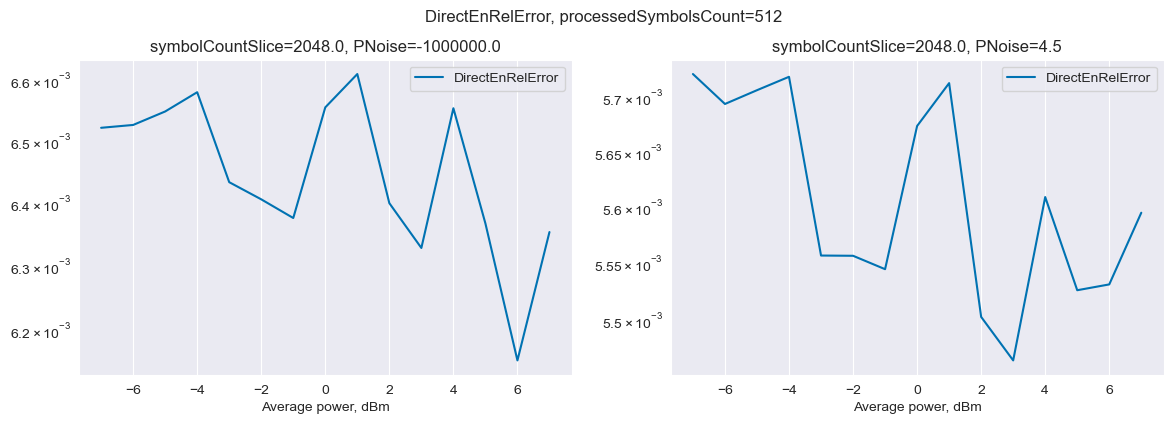

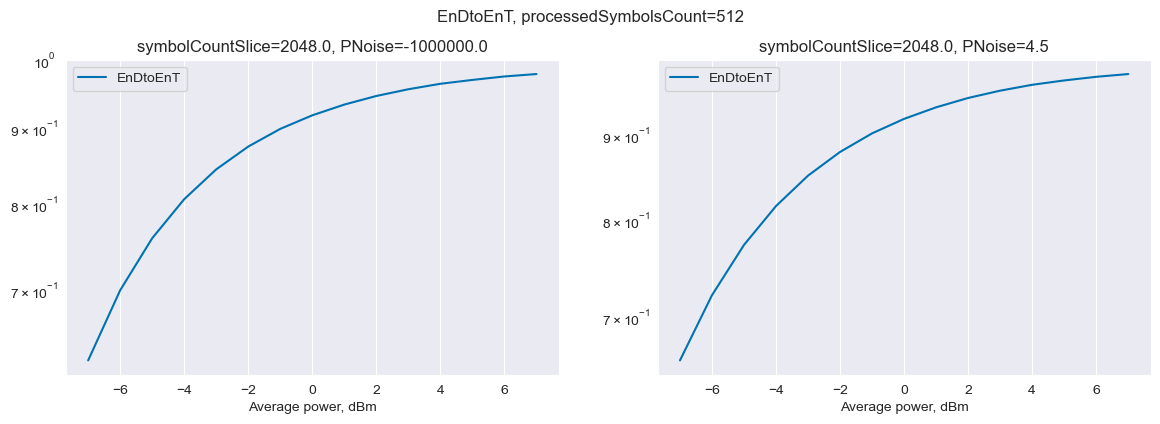

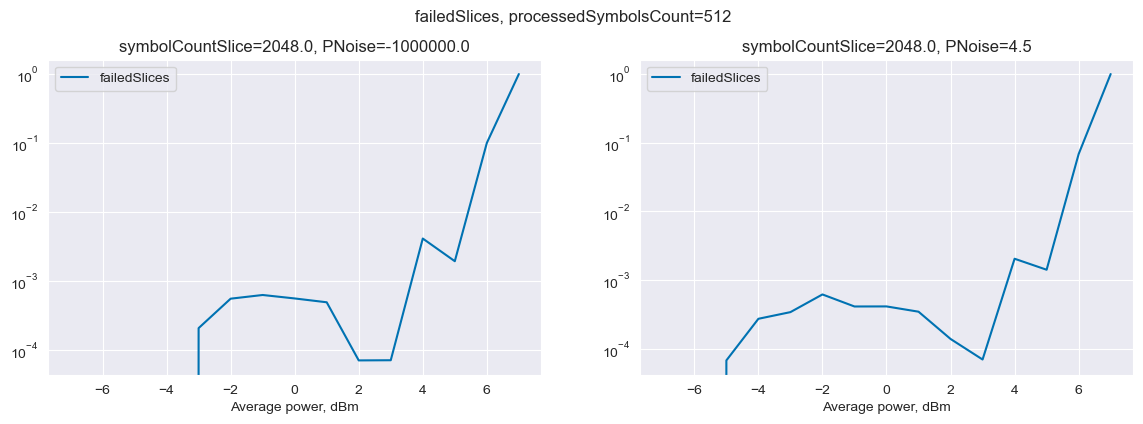

In [3]:
directory="data/Noise"
for folder in glob.glob(directory + "/*/", recursive = True):
    if "" in folder:
        all_files = glob.glob(folder + "TelecomTest*")
        li = []

        for filename in all_files:
            if os.path.getsize(filename) != 0:
                df = pd.read_csv(filename, "\t")
                li.append(df)

        if len(li) > 0:
            df = pd.concat(li, axis=0, ignore_index=True)

            df_clean = df[df.failedSlices == 0]

            print("Total:", len(df), len(df_clean)/len(df))
            
            df2 = df[df.SpS == 2]
            df4 = df[df.SpS == 4]
            dfc2 = df_clean[df_clean.SpS == 2]
            dfc4 = df_clean[df_clean.SpS == 4]
            
            print("SpS=2:", len(df2), len(dfc2)/len(df2))
            #print("SpS=4:", len(df4), len(dfc4)/len(df4))
            #continue
            
            df_mean = df.groupby(['inverseMethod', 'P0', 'PNoise', 'SpS', 'integrator', 'CDC', 'processedSymbolsCount',
                   'dispersionWidth', 'zeroPaddingWidth', 'zeroPadding', 'dispersionSymbolsCount']).mean().reset_index()

            df_clean_mean = df_clean.groupby(['inverseMethod', 'P0', 'PNoise', 'SpS', 'integrator', 'CDC', 'processedSymbolsCount',
                   'dispersionWidth', 'zeroPaddingWidth', 'zeroPadding', 'dispersionSymbolsCount']).mean().reset_index()
            
            #zeroAxisName = "P0" # разные группы картинок
            firstAxisName = "symbolCountSlice" # первая ось внутри группы картинок
            secondAxisName = "PNoise"
            #x='processedSymbolsCount'
            #xLabel='processedSymbolsCount'
            logy=True

            plotFigures(folder, df_clean_mean, ["BER_NFTWindow", "BER_CDC", "BER_DBP2", "BER_DBP3", "BER_DBP10"], firstAxisName = firstAxisName, secondAxisName=secondAxisName, logy=logy)
            plotFigures(folder, df_clean_mean, ["EVM_NFTWindow", "EVM_CDC", "EVM_DBP2", "EVM_DBP3", "EVM_DBP10"], firstAxisName = firstAxisName, secondAxisName=secondAxisName, logy=logy)
            #plotFigures(folder, df_clean_mean, ["BER_NFTWindow", "BER_CDC", "BER_DBP2",  "BER_DBP10"], firstAxisName = firstAxisName, logy=logy)
            #plotFigures(folder, df_clean_mean, ["EVM_NFTWindow", "EVM_CDC", "EVM_DBP2", "EVM_DBP10"], firstAxisName = firstAxisName, logy=logy)
            plotFigures(folder, df_mean, ["DSSize"], firstAxisName = firstAxisName, secondAxisName=secondAxisName, logy=logy)

            plotFigures(folder, df_clean_mean, ['timeDirectWindow', "timePropagationWindow", "timeInverseWindow", "timeDBP"], firstAxisName = firstAxisName, secondAxisName=secondAxisName, logy=logy)
            plotFigures(folder, df_mean, ["CallsTrackingWindow"], firstAxisName = firstAxisName, secondAxisName=secondAxisName, logy=logy)
            plotFigures(folder, df_mean, ["DirectEnRelError"], firstAxisName = firstAxisName, secondAxisName=secondAxisName, logy=logy)
            
            df_mean['EnDtoEnT'] = df_mean['DirectEnD'] / df_mean['DirectEnT']
            plotFigures(folder, df_mean, ["EnDtoEnT"], firstAxisName = firstAxisName, secondAxisName=secondAxisName, logy=logy)

            plotFigures(folder, df_mean, ["failedSlices"], firstAxisName = firstAxisName, secondAxisName=secondAxisName, logy=logy)

In [24]:
df_mean['PNoise']

NameError: name 'df_mean' is not defined

C:\Users\190243539\AppData\Local\Temp\ipykernel_250804\969097599.py:9: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv(filename, "\t")
C:\Users\190243539\AppData\Local\Temp\ipykernel_250804\969097599.py:9: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv(filename, "\t")
C:\Users\190243539\AppData\Local\Temp\ipykernel_250804\969097599.py:9: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv(filename, "\t")
C:\Users\190243539\AppData\Local\Temp\ipykernel_250804\969097599.py:9: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv(filename, "\t")
C:\Users\190243539\AppDa

Zero axis: processedSymbolsCount =  512
symbolCountSlice 1 PNoise 2
axes: [<Axes: > <Axes: >]
First axis: symbolCountSlice =  2048.0
Second axis: PNoise =  -1000000.0
Second axis: PNoise =  4.5
data/Noise\4.5\/BER_processedSymbolsCount=512.png


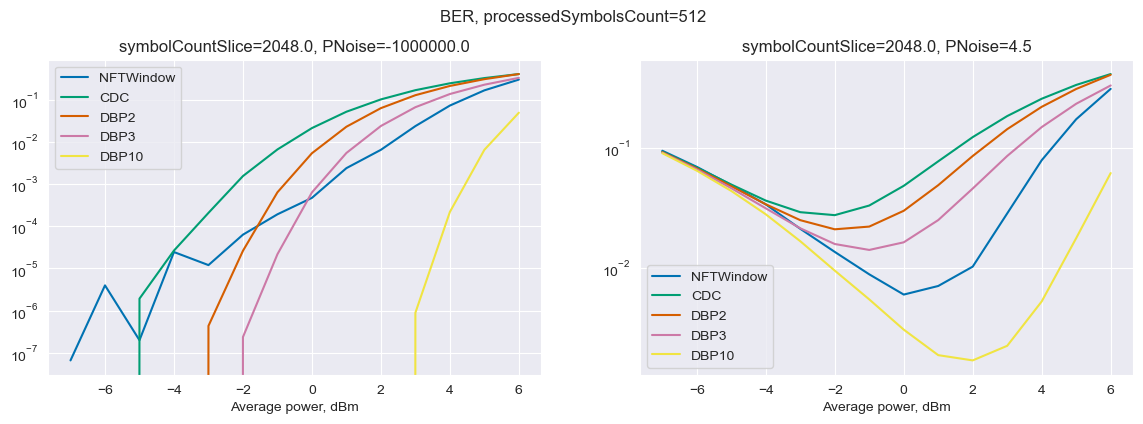

In [7]:
directory="data/Noise"
for folder in glob.glob(directory + "/*/", recursive = True):
    if "" in folder:
        all_files = glob.glob(folder + "TelecomTest*")
        li = []

        for filename in all_files:
            if os.path.getsize(filename) != 0:
                df = pd.read_csv(filename, "\t")
                li.append(df)

        if len(li) > 0:
            df = pd.concat(li, axis=0, ignore_index=True)

            df_clean = df[df.failedSlices == 0]
            df_clean_mean = df_clean.groupby(['inverseMethod', 'P0', 'PNoise', 'SpS', 'integrator', 'CDC', 'processedSymbolsCount',
                   'dispersionWidth', 'zeroPaddingWidth', 'zeroPadding', 'dispersionSymbolsCount']).mean().reset_index()

            #zeroAxisName = "P0" # разные группы картинок
            firstAxisName = "symbolCountSlice" # первая ось внутри группы картинок
            secondAxisName = "PNoise"
            logy=True

            plotFigures(folder, df_clean_mean, ["BER_NFTWindow", "BER_CDC", "BER_DBP2", "BER_DBP3", "BER_DBP10"], firstAxisName = firstAxisName, secondAxisName=secondAxisName, logy=logy)


In [9]:
df_p = df_clean_mean
df_p = df_p[df_p.PNoise == 4.5]

In [16]:
import scipy as sp

In [39]:

p_list = df_p["P0"].values
ber_nft = df_p["BER_NFTWindow"].values
ber_cdc = df_p["BER_CDC"].values
ber_dbp2 = df_p["BER_DBP2"].values
ber_dbp3 = df_p["BER_DBP3"].values
ber_dbp10 = df_p["BER_DBP10"].values
ber_4p = np.ones(len(p_list)) * 0.04

q_db_nft = 20 * np.log10(np.sqrt(2) * sp.special.erfcinv(2 * ber_nft))
q_db_cdc = 20 * np.log10(np.sqrt(2) * sp.special.erfcinv(2 * ber_cdc))
q_db_dbp2 = 20 * np.log10(np.sqrt(2) * sp.special.erfcinv(2 * ber_dbp2))
q_db_dbp3 = 20 * np.log10(np.sqrt(2) * sp.special.erfcinv(2 * ber_dbp3))
q_db_dbp10 = 20 * np.log10(np.sqrt(2) * sp.special.erfcinv(2 * ber_dbp10))
q_db_4p = 20 * np.log10(np.sqrt(2) * sp.special.erfcinv(2 * ber_4p))

In [13]:
df_p[["P0", "BER_NFTWindow", "BER_CDC", "BER_DBP2", "BER_DBP3", "BER_DBP10"]]

P0  BER_NFTWindow   BER_CDC  BER_DBP2  BER_DBP3  BER_DBP10
1   -7       0.094653  0.092961  0.092087  0.091301   0.090343
3   -6       0.069527  0.068607  0.067350  0.066210   0.064623
5   -5       0.049080  0.049555  0.047992  0.046222   0.043844
7   -4       0.033882  0.036442  0.033966  0.031426   0.028030
9   -3       0.021243  0.029196  0.025053  0.021443   0.016744
11  -2       0.013644  0.027580  0.021035  0.015874   0.009538
13  -1       0.008881  0.033159  0.022160  0.014170   0.005497
15   0       0.006028  0.048370  0.029989  0.016396   0.003080
17   1       0.007106  0.077313  0.048951  0.025099   0.001890
19   2       0.010294  0.122872  0.085607  0.045920   0.001709
21   3       0.028511  0.183902  0.143144  0.085648   0.002260
23   4       0.078932  0.256230  0.219513  0.148905   0.005284
25   5       0.173061  0.333766  0.308920  0.232724   0.017750
27   6       0.309630  0.411202  0.405213  0.330480   0.061727

In [27]:
plt.rcdefaults()
matplotlib.rcParams.update({'font.size': 20})

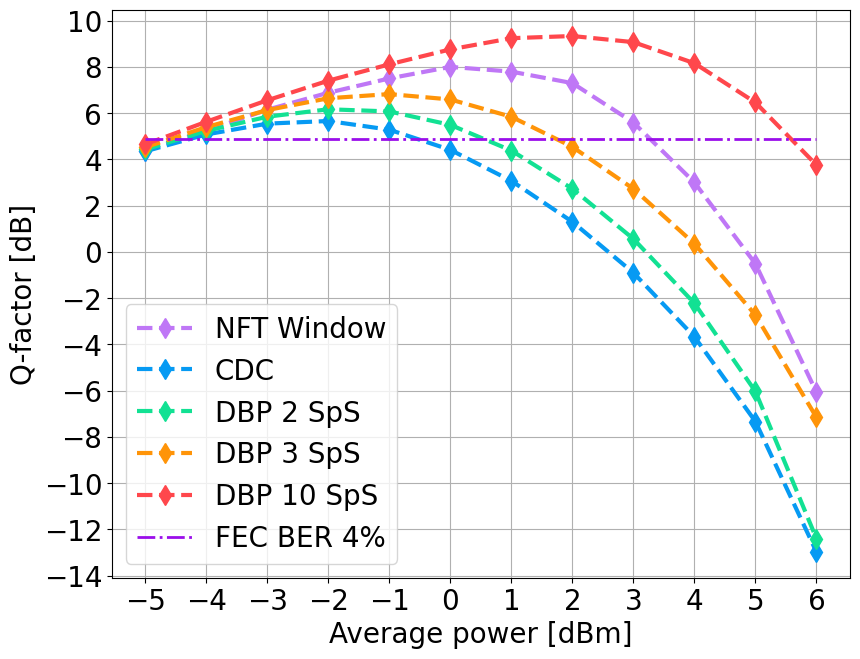

In [49]:
color = ['xkcd:violet', 'xkcd:royal blue', 'xkcd:green blue', 'xkcd:terra cotta', 'xkcd:brick red', 'xkcd:light purple']
color_add = ['xkcd:light purple', 'xkcd:azure', 'xkcd:aqua green', 'xkcd:tangerine', 'xkcd:light red', 'xkcd:violet']

fig, ax1 = plt.subplots(1, 1, figsize=(9, 7))
k = 0
plot_range = slice(2, 14)
# for p_ave_dbm_train in [5, 6, 7, 8]:
#     df_plot = df[(df.p_ave_dbm_train == p_ave_dbm_train)]
#
#     ber_orig = df_plot['ber_orig'].values
#     ber_pred = df_plot['ber_pred'].values
#     q_db_orig = df_plot['q_db_orig'].values
#     q_db_pred = df_plot['q_db_pred'].values
#
#     if k == 0:
#         ax1.plot(p_test_list[plot_range], q_db_orig[plot_range],
#                  marker='o', linewidth=3,
#                  markersize=10, label="Original",
#                  color=color[1]
#                 )
ax1.plot(p_list[plot_range], q_db_nft[plot_range],
         marker='d', linewidth=3,
         linestyle='--',
         markersize=10, label='NFT Window',
         color=color_add[k]
        )

k += 1
ax1.plot(p_list[plot_range], q_db_cdc[plot_range],
         marker='d', linewidth=3,
         linestyle='--',
         markersize=10, label='CDC',
         color=color_add[k]
        )

k += 1
ax1.plot(p_list[plot_range], q_db_dbp2[plot_range],
         marker='d', linewidth=3,
         linestyle='--',
         markersize=10, label='DBP 2 SpS',
         color=color_add[k]
        )

k += 1
ax1.plot(p_list[plot_range], q_db_dbp3[plot_range],
         marker='d', linewidth=3,
         linestyle='--',
         markersize=10, label='DBP 3 SpS',
         color=color_add[k]
        )

k += 1
ax1.plot(p_list[plot_range], q_db_dbp10[plot_range],
         marker='d', linewidth=3,
         linestyle='--',
         markersize=10, label='DBP 10 SpS',
         color=color_add[k]
        )

k += 1
ax1.plot(p_list[plot_range], q_db_4p[plot_range],
         marker='', linewidth=2,
         linestyle='-.',
         markersize=10, label='FEC BER 4%',
         color=color_add[k]
        )

    #
    # i = -1
    # if p_ave_dbm_train == 7:
    #     i = 5
    # elif p_ave_dbm_train == 6:
    #     i = 4
    #
    # if i != -1:
    #     ax1.plot(p_test_list[i:i+2], [q_db_pred[i],q_db_pred[i]],
    #              marker='d', linewidth=2,
    #              linestyle='--',
    #              markersize=0,
    #              color=color_add[k])
    #     ax1.plot(p_test_list[i:i+2], [q_db_orig[i],q_db_orig[i]],
    #              marker='d', linewidth=2,
    #              linestyle='--',
    #              markersize=0,
    #              color=color_add[k])
    #     ax1.arrow(x=p_test_list[i+1], y=q_db_orig[i], dx=0, dy=(q_db_pred[i]-q_db_orig[i]),
    #               width=0.03,
    #               length_includes_head=True,
    #               color=color_add[k])
    #     ax1.arrow(x=p_test_list[i+1], y=q_db_pred[i], dx=0, dy=(q_db_orig[i]-q_db_pred[i]),
    #               width=0.03,
    #               length_includes_head=True,
    #               color=color_add[k])
    #     ax1.text(x=p_test_list[i+1] * 1.01, y=q_db_orig[i] * 1.04, s="{:1.2f} dB".format(q_db_pred[i]-q_db_orig[i]),
    #              color=color_add[k])
    #
    # k += 1


ax1.grid(True)
ax1.set_xlabel('Average power [dBm]')
# ax1.set_ylabel('BER', color=color)
ax1.set_ylabel('Q-factor [dB]')
# ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='y')
ax1.yaxis.set_ticks(np.arange(-14, 12, 2))
ax1.xaxis.set_ticks(p_list[plot_range])


leg = plt.legend(fontsize=20, loc='lower left')
# leg.legendHandles[0].set_color('black')
# leg.legendHandles[1].set_color('black')

# plt.title(r'WDM 16-QAM | $20 \times 80$ km ', fontsize=20)

# plt.legend(fontsize=20)
fig.tight_layout()

fig.savefig('q_nft_window.pdf', format='pdf', bbox_inches='tight')